In [5]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.6/38.8 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.2/38.8 MB 6.8 MB/s eta 0:00:06
   - -------------------------------------- 1.9/38.8 MB 8.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/38.8 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.8 MB 12.9 MB/s eta 0:00:03
   ----- ---------------------------------- 5.6/38.8 MB 14.8 MB/s eta 0:00:03
   ------- -------------------------------- 6.9/38.8 MB 16.3 MB/s eta 0:00:02
   -------- ------------------------------- 8.0/38.8 MB 17.1 MB/s eta 0:00:02
   ---------- ----------------------------- 9.8/38.8 MB 19.0 MB/s eta 0:00:02
   ----------- ---------------------------- 11.2/38.8 MB 24.2 MB/s eta 0:00:02
   --

In [33]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [29]:
path = 'C:/Users/User/Desktop/Data_Science/Image_Detection'

In [463]:
# img_man_face_bgr = cv.imread(os.path.join(path, 'man_face.jpg'))
img_man_face_bgr = cv.imread(os.path.join(path, 'woman_face.jpg'))

(-0.5, 399.5, 599.5, -0.5)

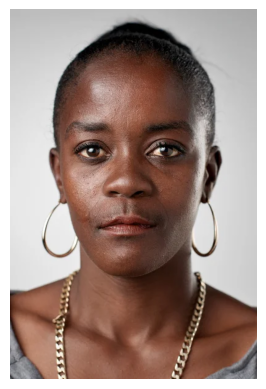

In [209]:
img_man_face_rgb = cv.cvtColor(img_man_face_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_man_face_rgb)
plt.axis('off')

(-0.5, 399.5, 599.5, -0.5)

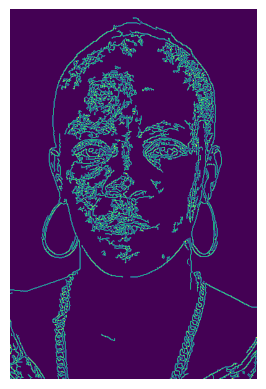

In [213]:
img_gray = cv.cvtColor(img_man_face_bgr, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray, 50, 150)

plt.imshow(edges)
plt.axis('off')

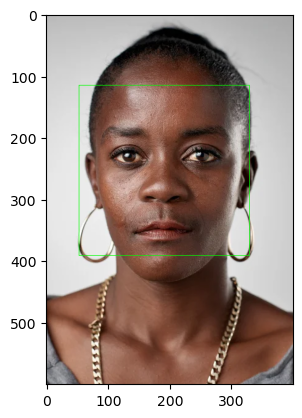

In [217]:
# Face detection
img_face_det = img_man_face_rgb.copy()



# plt.imshow(img_gray)
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
face = face_cascade.detectMultiScale(img_gray)

for x, y, w, h in face:
    cv.rectangle(img_face_det, (x, y), (x + w, y + h), (0, 255, 0))

plt.imshow(img_face_det)

In [183]:
img_profile_bgr = cv.imread(os.path.join(path, 'profile_woman.jpg'))
# img_profile_bgr = cv.imread(os.path.join(path, 'profile_man.jpg'))

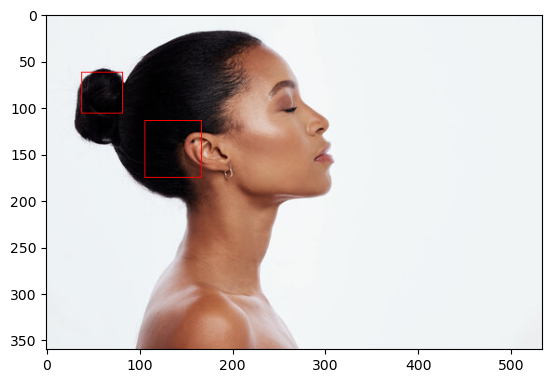

In [199]:
img_profile_rgb = (cv.cvtColor(img_profile_bgr, cv.COLOR_BGR2RGB))

img_prof_det = img_profile_rgb.copy()

img_profile_gray = cv.cvtColor(img_profile_bgr, cv.COLOR_BGR2GRAY)

img_profile_gray = cv.equalizeHist(img_profile_gray)
# img_profile_gray = cv.GaussianBlur(img_profile_gray, (5, 5), 0)

prof_face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_profileface.xml')
prof_face = prof_face_cascade.detectMultiScale(img_profile_gray, scaleFactor=1.01, minNeighbors=1)

for x, y, w, h in prof_face:
    cv.rectangle(img_prof_det, (x,y), (x+w, y+h), (255, 0, 0))

plt.imshow(img_prof_det)

In [577]:
def face_smile_eyes(img):

    img_new = img.copy()

    img_gray = cv.cvtColor(img_new, cv.COLOR_BGR2GRAY)
    img_gray = cv.equalizeHist(img_gray)

    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(img_gray, scaleFactor= 1.2, minNeighbors= 3)

    for x, y, w, h in face:
        cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)

        face_ROI = img_gray[y:y+h, x:x+w]
        eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')
        smile_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')

        eye = eye_cascade.detectMultiScale(face_ROI, scaleFactor = 1.01, minNeighbors = 2, minSize = (50,50)) 
        # MinSize is adjusted for this kind of images. What to do, if can be different? Or it is compensated by rescaling?

        for x1, y1, w1, h1 in eye:
            cv.rectangle(img_new, (x + x1, y + y1), (x + x1 + w1, y + y1 + h1), (0, 255, 0), 3)

        smile = smile_cascade.detectMultiScale(face_ROI, scaleFactor = 1.2, minNeighbors = 21, minSize = (50,100))
        for x2, y2, w2, h2 in smile:
            cv.rectangle(img_new, (x + x2, y + y2), (x + x2 + w2, y + y2 + h2), (0, 0, 255), 1)

    plt.imshow(cv.cvtColor(img_new, cv.COLOR_BGR2RGB))
    

In [579]:
full_face = cv.imread(os.path.join(path, 'man_face.jpg'))

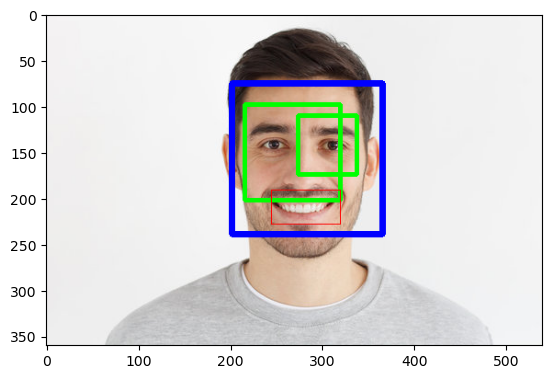

In [585]:
face_smile_eyes(full_face)

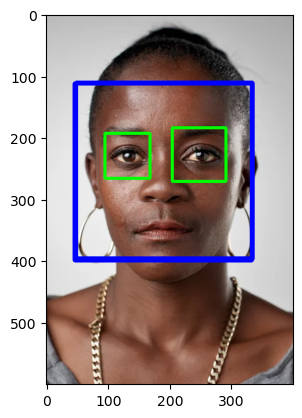

In [587]:
face_smile_eyes(img_man_face_bgr)

In [591]:
img_smile_bgr = cv.imread(os.path.join(path, 'face_smile.jpg'))

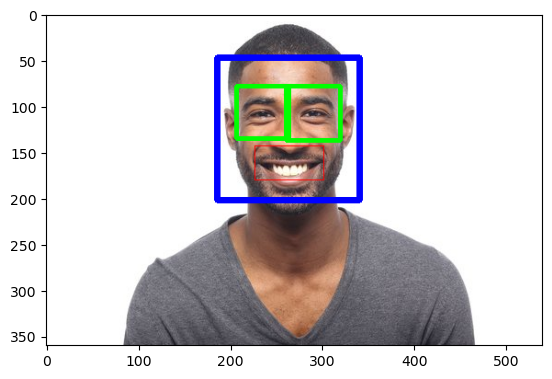

In [595]:
face_smile_eyes(img_smile_bgr)

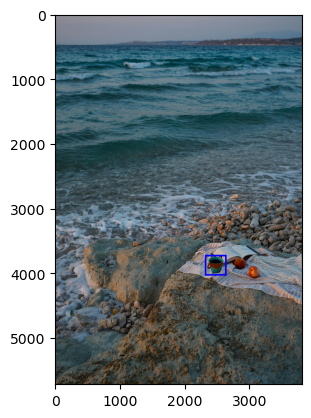

In [623]:
# Match templates
source = cv.imread(os.path.join(path, 'match_source.jpg'))
template = cv.imread(os.path.join(path, 'match_template.jpg'))

source_copy = source.copy()

source_gray = cv.cvtColor(source, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

h, w = template_gray.shape

match = cv.matchTemplate(source, template, cv.TM_CCOEFF_NORMED)

loc = np.where(match >= 0.8)

for pt in zip(*loc[::-1]): # reversed because loc return tuple of arrays (y, x)
    cv.rectangle(source_copy, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)
    
#Should not it draw a rectangle around each pixel? Loc returns many coordenates

plt.imshow(cv.cvtColor(source_copy, cv.COLOR_BGR2RGB))


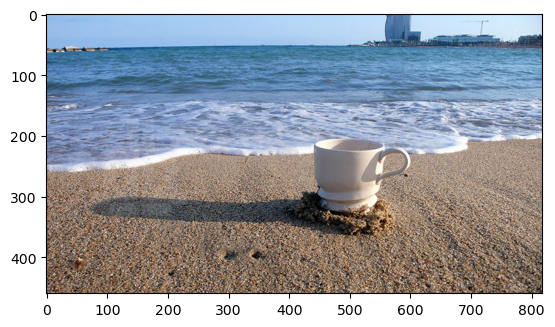

In [627]:
source_2 = cv.imread(os.path.join(path, 'match_source_2.jpg'))
template = cv.imread(os.path.join(path, 'match_template.jpg'))

source_copy_2 = source_2.copy()

source_gray_2 = cv.cvtColor(source_2, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

h, w = template_gray.shape

match = cv.matchTemplate(source_2, template, cv.TM_CCOEFF_NORMED)

loc = np.where(match >= 0.8)

for pt in zip(*loc[::-1]): # reversed because loc return tuple of arrays (y, x)
    cv.rectangle(source_copy_2, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)
    
#Should not it draw a rectangle around each pixel? Loc returns many coordenates

plt.imshow(cv.cvtColor(source_copy_2, cv.COLOR_BGR2RGB))

In [9]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error. Could not find the camera.")
else:
    while True:
        # Чтение кадра
        ret, frame = cap.read()

        if not ret:
            print("Error raised reading video.")
            break

        # Отображение кадра
        cv2.imshow('Video Stream', frame)

        # Если была нажата клавиша 'q', то выход из цикла
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Освобождение ресурсов и закрытие окон
    cap.release()
    cv2.destroyAllWindows()

In [17]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру.")
else:
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Ошибка при чтении видео.")
            break

        # Уменьшаем изображение в 2 раза
        frame = cv2.resize(frame, (int(frame.shape[1]/2), int(frame.shape[0]/2)))

        # Цветовой фильтр (здесь будем выделять зеленый цвет, как в предыдущем примере)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_green = np.array([35, 50, 50])
        upper_green = np.array([85, 255, 255])
        mask = cv2.inRange(hsv, lower_green, upper_green)
        color_filtered = cv2.bitwise_and(frame, frame, mask=mask)

        # Фильтр границ (используем Canny детектор границ)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # делаем изображение трехканальным для объединения

        # Объединение изображений
        output = np.hstack((color_filtered, edges_colored, frame))

        cv2.imshow('Video Stream', output)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [21]:
# Инициализация видеопотока с веб-камеры (обычно веб-камера имеет индекс 0)
cap = cv2.VideoCapture(0)

# Проверка, инициализирован ли видеопоток корректно
if not cap.isOpened():
    print("Ошибка: не удалось открыть камеру!")
    exit()

# Загрузка предварительно обученного каскада Хаара для детектирования лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Захват кадра из видеопотока
    ret, frame = cap.read()
    if not ret:
        break

    # Конвертация кадра в оттенки серого
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Детектирование лиц на кадре
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Рисуем прямоугольники вокруг обнаруженных лиц
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Отображение обработанного кадра
    cv2.imshow('Face Detection', frame)

    # Для выхода из цикла нажмите клавишу 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Освобождение ресурсов и закрытие окон
cap.release()
cv2.destroyAllWindows()